In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow
from tensorflow import keras
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Reshape,Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.utils import load_img, img_to_array, array_to_img, to_categorical
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint
import glob

from IPython import display
print ("tensorflow version: ", tensorflow.__version__ )

tensorflow version:  2.15.0


In [ ]:

from sklearn.model_selection import train_test_split
import os
import cv2 as cv
import glob
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import tensorflow as tf
from IPython import display



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

fer_df= pd.read_csv("/content/drive/MyDrive/fer2013.csv")


fer_df.shape

(35887, 3)

In [ ]:
fer_df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


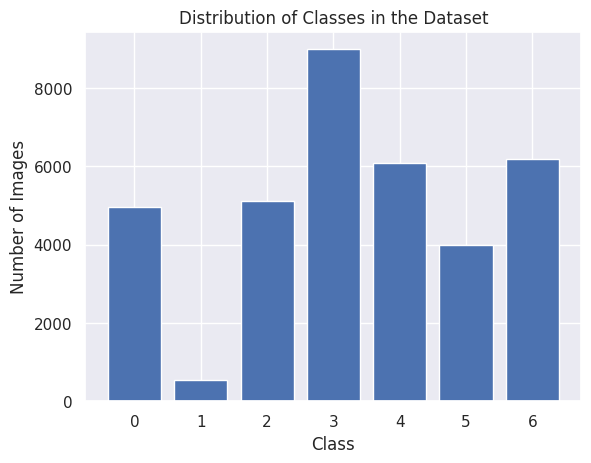

In [ ]:


import matplotlib.pyplot as plt
emotion_counts = fer_df['emotion'].value_counts()
class_names = emotion_counts.index.to_list()
emotion_counts_values = emotion_counts.to_list()

plt.bar(class_names, emotion_counts_values)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Classes in the Dataset")
plt.show()


In [ ]:
import pandas as pd
import numpy as np


# Create a dictionary to map integer labels to emotion names
emotion_mapping = {
    0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral'
}


fer_df['emotion_name'] = fer_df['emotion'].map(emotion_mapping)


emotion_dfs = {}
for emotion_name in emotion_mapping.values():
    emotion_dfs[emotion_name] = fer_df[fer_df['emotion_name'] == emotion_name]


for emotion_name, df in emotion_dfs.items():
    print(f"{emotion_name}: {len(df)} samples")


anger: 4953 samples
disgust: 547 samples
fear: 5121 samples
happiness: 8989 samples
sadness: 6077 samples
surprise: 4002 samples
neutral: 6198 samples


In [ ]:
df_disgust = emotion_dfs['disgust']

In [ ]:
df_disgust.head()

,emotion,pixels,Usage,emotion_name
299,1,126 126 129 120 110 168 174 172 173 174 170 15...,Training,disgust
388,1,89 55 24 40 43 48 53 55 59 41 33 31 22 32 42 4...,Training,disgust
416,1,204 195 181 131 50 50 57 56 66 98 138 161 173 ...,Training,disgust
473,1,14 11 13 12 41 95 113 112 111 122 132 137 142 ...,Training,disgust
533,1,18 25 49 75 89 97 100 100 101 103 105 107 107 ...,Training,disgust


In [ ]:
x_train_pixels=fer_df.pixels.str.split(" ").tolist()   # We remove the spaces and add the pixel values to the list.
x_train_pixels=pd.DataFrame(x_train_pixels, dtype= float)   # let's convert the pixel list to dataframe

In [ ]:
x_train_pixels.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70.0,80.0,82.0,72.0,58.0,58.0,60.0,63.0,54.0,58.0,...,159.0,182.0,183.0,136.0,106.0,116.0,95.0,106.0,109.0,82.0
1,151.0,150.0,147.0,155.0,148.0,133.0,111.0,140.0,170.0,174.0,...,105.0,108.0,95.0,108.0,102.0,67.0,171.0,193.0,183.0,184.0
2,231.0,212.0,156.0,164.0,174.0,138.0,161.0,173.0,182.0,200.0,...,104.0,138.0,152.0,122.0,114.0,101.0,97.0,88.0,110.0,152.0
3,24.0,32.0,36.0,30.0,32.0,23.0,19.0,20.0,30.0,41.0,...,174.0,126.0,132.0,132.0,133.0,136.0,139.0,142.0,143.0,142.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,34.0,31.0,31.0,31.0,27.0,31.0,30.0,29.0,30.0


In [ ]:
train_images = x_train_pixels.values  #


x_train = train_images.astype(np.float64)

# print(x_train.shape)


In [ ]:
x_train=x_train.reshape(x_train.shape[0],48,48,1)
x_train.shape

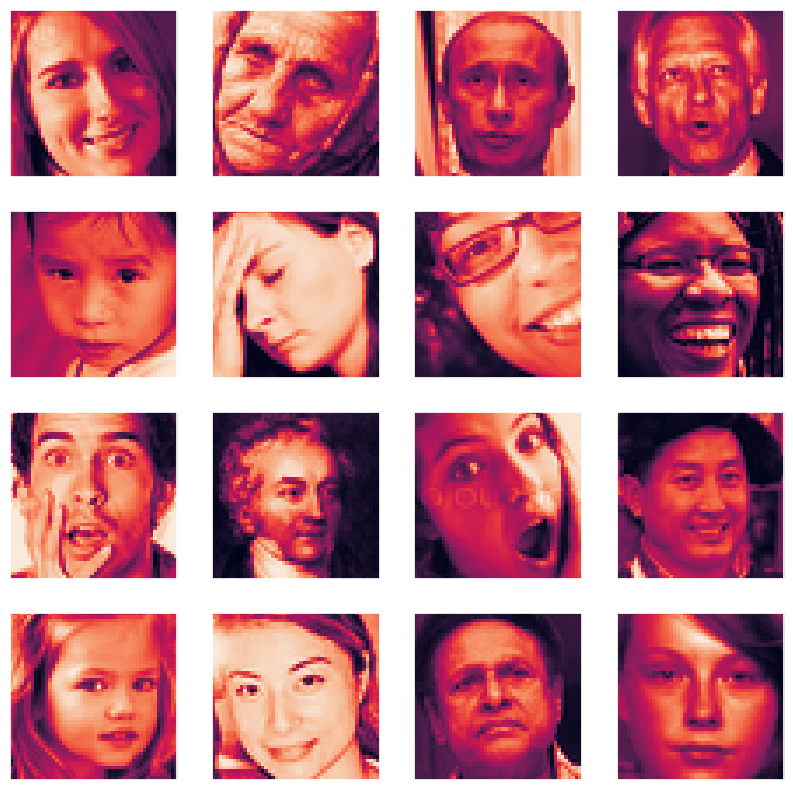

In [ ]:
plt.figure(figsize=(10,10))
for i in range (16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[np.random.randint(0,35880)] )

plt.show()

In [ ]:
def create_discriminator(in_shape=(48,48,1)):

    model= Sequential() #

    # 1st
    model.add(Conv2D(64,(3,3), strides=(2,2), padding= "same", input_shape= in_shape ))
    model.add(LeakyReLU(alpha=0.2))

    # 2nd
    model.add(Conv2D(128,(3,3), strides=(2,2), padding= "same"))
    model.add(LeakyReLU(alpha=0.2))

    # 3rd
    model.add(Conv2D(128,(3,3), strides=(2,2), padding= "same"))
    model.add(LeakyReLU(alpha=0.2))

    # 4th
    model.add(Conv2D(64,(3,3), strides=(2,2), padding= "same"))
    model.add(LeakyReLU(alpha=0.2))


    # Full
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))

    #Optimizer
    opt= Adam(learning_rate= 0.0001, beta_1=0.5)


    model.compile(loss= "binary_crossentropy",
                 optimizer=opt,
                 metrics=["accuracy"])

    return model

discriminatorx= create_discriminator()
discriminatorx.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 12, 12, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 6, 6, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          7

In [ ]:
def create_generator( latent_dim):

    model= Sequential()

    n_nodes=128*6*6

    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((6, 6, 128)))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding= "same"))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding= "same"))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding= "same"))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(1, (8,8), activation= "tanh", padding= "same"))

    return model

generatorx= create_generator(100)
generatorx.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4608)              465408    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 4608)              0         
                                                                 
 reshape (Reshape)           (None, 6, 6, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 12, 12, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 12, 12, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 24, 24, 64)        131136    
 Transpose)                                           

In [ ]:
def create_gan(generator, discriminator):

    discriminator.trainable= False

    model= Sequential()



    model.add(generator)
    model.add(discriminator)

    model.compile(loss= "binary_crossentropy",
                 optimizer=Adam(learning_rate= 0.0001, beta_1=0.5))

    return model

In [ ]:
def load_real_samples():
    x_train
    X= (x_train.astype("float32")-127.5)/127.5

    return X

In [ ]:

latent_dim=100


discriminator =create_discriminator()
generator = create_generator(latent_dim)
gan_model = create_gan(generator, discriminator)

dataset= load_real_samples()

In [ ]:


def generate_real_samples(dataset, n_samples): # n_sample---> number of sample images

    ix= np.random.randint(0, dataset.shape[0], n_samples)  # choose random samples

    X= dataset[ix]

    y= np.ones((n_samples,1))

    return X,y

In [ ]:
def generate_latent_points(latent_dim, n_samples):

    x_input = np.random.randn(latent_dim * n_samples) # Create latent point

    x_input = x_input.reshape(n_samples, latent_dim) # reshape latent points for input
    return x_input

In [ ]:
# Create fake images

def generate_fake_samples(generator, latent_dim, n_samples):

    x_input= generate_latent_points(latent_dim, n_samples) #call the function to create latent points

    X= generator.predict(x_input)

    y= np.zeros((n_samples,1))

    return X,y

In [ ]:
def generate_and_save_images(model, epoch, test_input):

  predictions= model(test_input, training=False)

  fig= plt.figure(figsize=(10,10))

  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(predictions[i,:,:,0]*127.5*127.5 ) #cmap="binary"
    plt.axis("off")

  plt.savefig("./produced_images_epoch_{:04d}.png".format(epoch)) # save images produced in each epoch
  plt.show()

Text(0.5, 1.0, 'SEED')

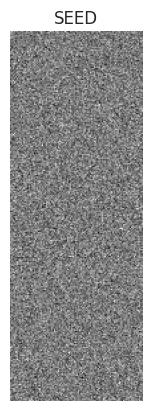

In [ ]:
n_batch=128

num_epochs=int(dataset.shape[0]/n_batch)

seed= tensorflow.random.normal(shape=[num_epochs,100])

plt.imshow(seed, cmap="binary")#show seed
plt.axis("off")
plt.title("SEED")

In [ ]:
from keras.callbacks import ModelCheckpoint
import numpy as np

def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=5, n_batch=128):
    batch_per_epoch = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)

    # Create a callback to save checkpoints
    checkpoint_callback = ModelCheckpoint("gan_checkpoint.h5", monitor='g_loss', verbose=1, save_best_only=True, mode='min')

    for i in range(n_epochs):
        for j in range(batch_per_epoch):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss_real, _ = d_model.train_on_batch(X_real, y_real)

            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            d_loss_fake, _ = d_model.train_on_batch(X_fake, y_fake)

            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = np.ones((n_batch, 1))

            g_loss = gan_model.train_on_batch(X_gan, y_gan)

        # Save checkpoint at the end of each epoch

        gan_model.save_weights("gan_checkpoint_epoch_{}.h5".format(i+1))

        print("Epoch:", i+1)
        print("  Discriminator Loss (Real/Fake):", d_loss_real, d_loss_fake)
        print("  Generator Loss:", g_loss)

        display.clear_output(wait=True) # clear output on screen
        generate_and_save_images(generator, i+1, seed) # generate, display and save images in new epoch

        print( "epochs: ", i)

    display.clear_output(wait=True)
    generate_and_save_images(generator, i, seed)

    # Save final model
    g_model.save("./face_generator.h5")


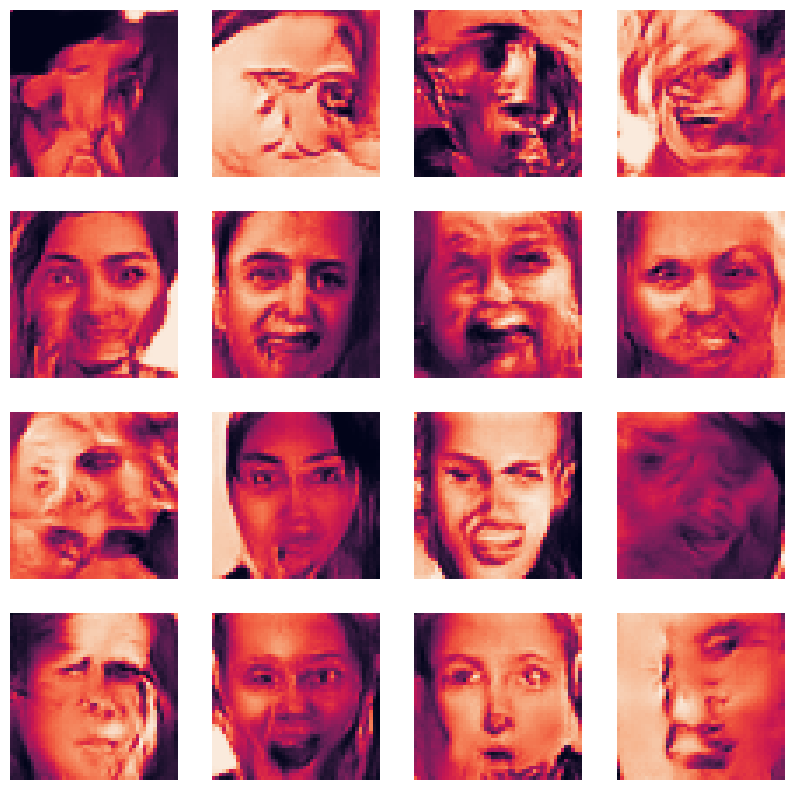

epochs:  154
2/2 [==============================] - 0s 6ms/step
Epoch: 156
  Discriminator Loss (Real/Fake): 0.6980934739112854 0.6761791706085205
  Generator Loss: 0.7352830171585083


In [ ]:
train(generator, discriminator, gan_model, dataset, latent_dim, n_epochs= 200)